In [1]:
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')

df = df[['v1','v2']]
df.columns = ['label','message']

df['label'] = df['label'].map({'ham':0, 'spam':1})

df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


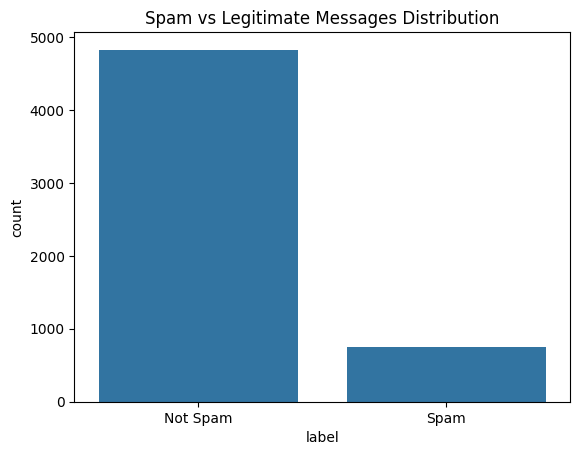

Percentage of Spam Messages: 13.406317300789663


In [4]:
sns.countplot(x=df['label'])
plt.xticks([0,1],['Not Spam','Spam'])
plt.title("Spam vs Legitimate Messages Distribution")
plt.show()

print("Percentage of Spam Messages:", (df['label'].value_counts(normalize=True)[1])*100)

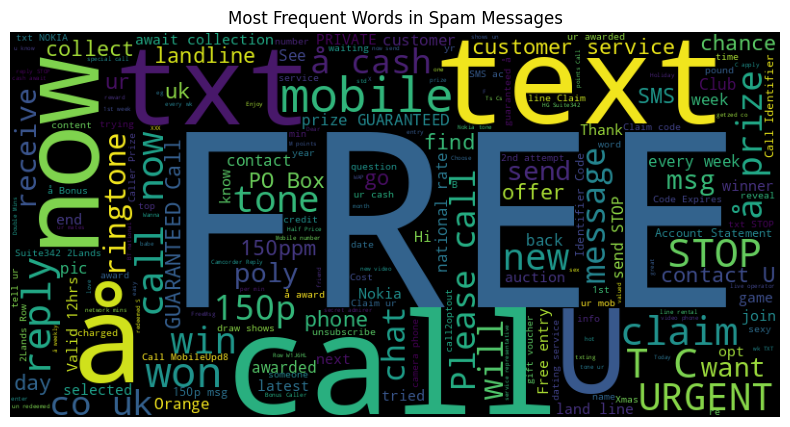

In [5]:
spam_words = ' '.join(df[df['label']==1]['message'])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Frequent Words in Spam Messages")
plt.show()

In [6]:
X = df['message']
y = df['label']

vectorizer = TfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.968609865470852


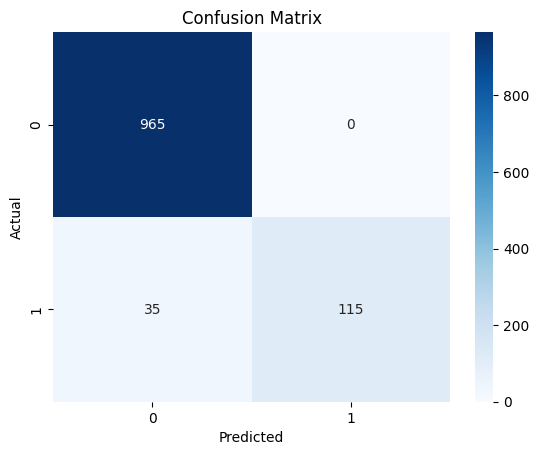

In [8]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [10]:
def predict_sms(text):
    transformed = vectorizer.transform([text])
    prediction = model.predict(transformed)[0]

    if prediction == 1:
        return "⚠️ SPAM MESSAGE"
    else:
        return "✅ NOT SPAM"

# Try your own message
sms = input("Enter SMS: ")
print(predict_sms(sms))

Enter SMS: Congratulations! You have won a FREE iPhone. Click here to claim your prize now.
⚠️ SPAM MESSAGE


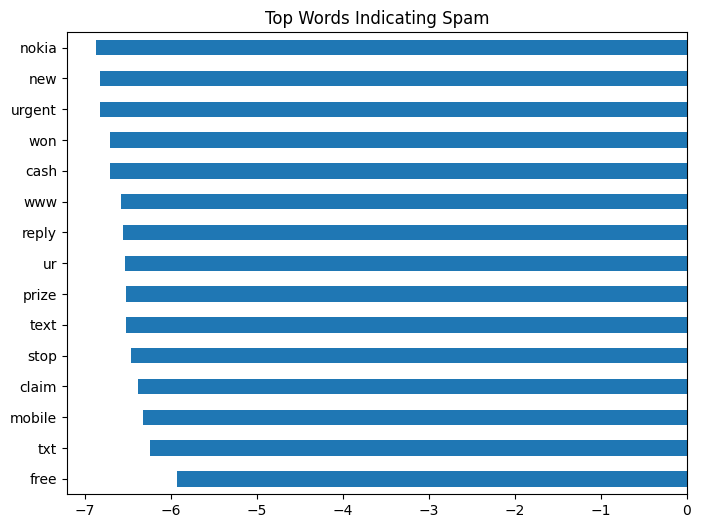

In [11]:
feature_names = np.array(vectorizer.get_feature_names_out())
spam_tokens = model.feature_log_prob_[1]

top_spam = pd.Series(spam_tokens, index=feature_names).sort_values(ascending=False)[:15]

top_spam.plot(kind='barh', figsize=(8,6), title="Top Words Indicating Spam")
plt.show()